box-filter on the noisy image


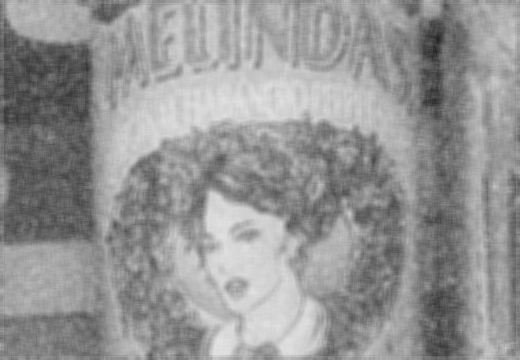

median-filter on the noisy image


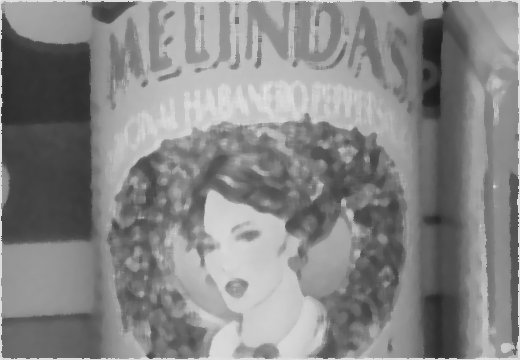

Mean Squared Error on box-filter image : 838.8799252136752
Mean Squared Error on median-filter image : 399.36258012820514
Peak Signal-to-Noise Ratio on box-filter image 18.893805592157065
Peak Signal-to-Noise Ratio on median-filter image 22.11712991382733
original image in gray-scale with noise


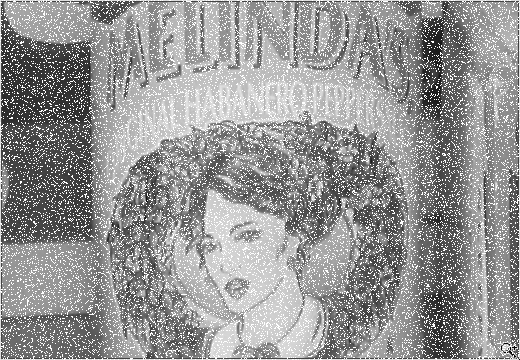

In [ ]:
from numpy.lib.function_base import median
import cv2 as cv 
import numpy as np
from google.colab.patches import cv2_imshow
from skimage.util import random_noise
from matplotlib import pyplot as plt
from math import log10, sqrt

def filter_img(intensity_image):

  gray=cv.cvtColor(intensity_image,cv.COLOR_BGR2GRAY)
  noise=np.random.normal(0,1,(gray.shape[0],gray.shape[1])).astype('uint8')

  # noise=np.dtype('uint8')
  # creating the noisy image
  noise=cv.add(noise,gray)

  # adding box-filter on the noisy image
  box=cv.boxFilter(noise,-1,(7, 7));
  print("box-filter on the noisy image")
  cv2_imshow(box)

  # adding median-filter on the noisy image
  noisee = np.uint8(noise)
  median =  cv.medianBlur(noisee,7)
  print("median-filter on the noisy image")
  cv2_imshow(median)    
  
  # Mean Squared Error on box-filter image
  errb = np.sum((gray.astype("float") - box.astype("float")) ** 2)
  errb /= float(gray.shape[0] * gray.shape[1])
  print("Mean Squared Error on box-filter image :",errb)

  # Mean Squared Error on median-filter image
  errm = np.sum((gray.astype("float") - median.astype("float")) ** 2)
  errm /= float(gray.shape[0] * gray.shape[1])
  print("Mean Squared Error on median-filter image :",errm)



  # Peak Signal-to-Noise Ratio on box-filter image
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(errb))
  print("Peak Signal-to-Noise Ratio on box-filter image",psnr)


  # Peak Signal-to-Noise Ratio on median-filter image
  max_pixel = 255.0
  psnr = 20 * log10(max_pixel / sqrt(errm))
  print("Peak Signal-to-Noise Ratio on median-filter image",psnr)


  cv.imwrite("noisy_image.jpeg",noise)
  cv.imwrite("box.jpeg",box)
  cv.imwrite("median.jpeg",median)


  print("original image in gray-scale with noise")
  return cv2_imshow(noise)








filter_img(cv.imread("/content/DSCN0479-001.JPG"))







#Theoretical Part:-
#first question:
#The best result was for the median filter because it got less error measurement.
#
#second question:-
#visually the median filter is better when dealing with noise and more clear 
#comparing to the box filter.